In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dane = pd.read_csv('dane_dif.csv', sep = ';', decimal = ',',
                   index_col=0)
dane

,dzien,prodA,prodB,Miesiac
0,1,8.2,1.4,luty
1,2,9.9,0.4,luty
2,3,6.1,0.7,luty
3,4,6.4,1.9,luty
4,5,8.2,0.7,luty
...,...,...,...,...
85,27,1.5,0.7,styczen
86,28,0.7,0.2,styczen
87,29,2.9,0.9,styczen
88,30,2.3,0.8,styczen


In [3]:
dane['Sprzedaz_calkowita'] = dane['prodA']+dane['prodB']

In [4]:
kolejnoscMiesiecy = {'styczen': 1, 'luty': 2, 'marzec': 3}
dane['Miesiac'] = pd.Categorical(dane['Miesiac'], categories=kolejnoscMiesiecy.keys(), ordered=True)
dane_posortowane = dane.sort_values(by=['Miesiac', 'dzien'])
dane_posortowane.reset_index(drop=True, inplace=True)

In [5]:
dane = dane_posortowane

In [6]:
dane

,dzien,prodA,prodB,Miesiac,Sprzedaz_calkowita
0,1,3.1,0.4,styczen,3.5
1,2,1.8,0.1,styczen,1.9
2,3,0.5,0.2,styczen,0.7
3,4,1.8,0.1,styczen,1.9
4,5,2.3,0.3,styczen,2.6
...,...,...,...,...,...
85,27,7.2,2.6,marzec,9.8
86,28,17.5,0.2,marzec,17.7
87,29,8.2,1.6,marzec,9.8
88,30,14.0,3.8,marzec,17.8


Text(0.5, 1.0, 'Sprzedaz calkowita w kolejnych dniach kwartalu 1')

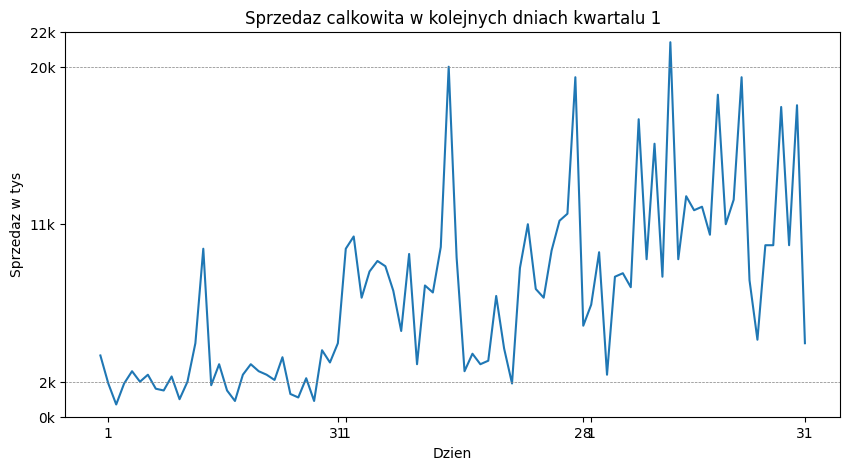

In [7]:
min_val = int(dane['Sprzedaz_calkowita'].min())
min_val = min_val - 1 if min_val >0 else min_val

max_val = int(dane['Sprzedaz_calkowita'].max())
max_val = max_val +1

half_val= (min_val+max_val) / 2

plt.figure(figsize=(10,5))
plt.plot(dane['Sprzedaz_calkowita'] )

custom_y_ticks = (min_val, min_val+2,half_val,max_val-2,max_val)
custom_y_labels = [f"{min_val}k","2k","11k","20k", "22k"]
xticks_positions = [1, 30, 31, 61, 62, 89]
xticks_labels = ['1', '31', '1', '28', '1', '31']

grid_val = [2, max_val-2]

for value in grid_val:
  plt.axhline(y=value, linestyle='--',linewidth=0.5, color='gray')

plt.ylim(min_val,max_val)
plt.yticks(custom_y_ticks, custom_y_labels)
plt.xticks(xticks_positions,xticks_labels )
plt.xlabel('Dzien')
plt.ylabel('Sprzedaz w tys')
plt.title("Sprzedaz calkowita w kolejnych dniach kwartalu 1")

In [8]:
dane

,dzien,prodA,prodB,Miesiac,Sprzedaz_calkowita
0,1,3.1,0.4,styczen,3.5
1,2,1.8,0.1,styczen,1.9
2,3,0.5,0.2,styczen,0.7
3,4,1.8,0.1,styczen,1.9
4,5,2.3,0.3,styczen,2.6
...,...,...,...,...,...
85,27,7.2,2.6,marzec,9.8
86,28,17.5,0.2,marzec,17.7
87,29,8.2,1.6,marzec,9.8
88,30,14.0,3.8,marzec,17.8


Miesiac
styczen    12
luty       54
marzec     59
Name: prodB, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_1840\1305596021.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  punkty = dane.groupby('Miesiac')['prodB'].idxmax()


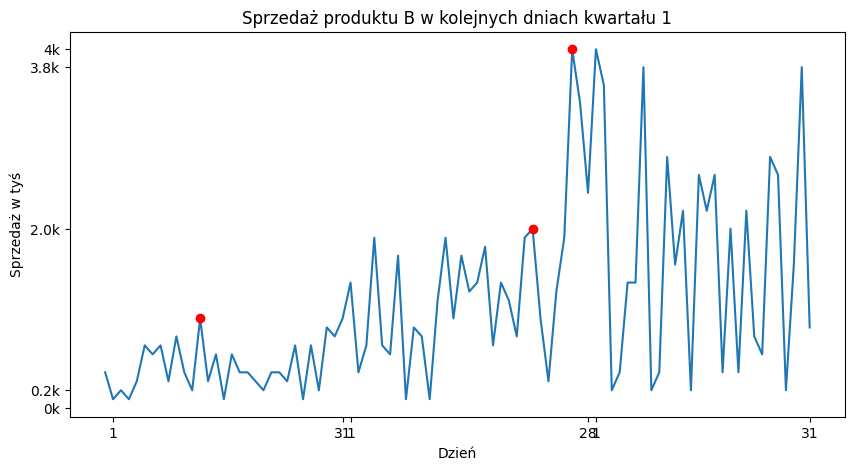

In [9]:
# punkty = dane.index[dane['prodB'] == dane['prodB'].max()]
punkty = dane.groupby('Miesiac')['prodB'].idxmax()
print(punkty)
plt.figure(figsize=(10,5))
plt.plot(dane.index, dane['prodB'])
plt.plot(punkty, dane.loc[punkty, 'prodB'], 'ro')
plt.title('Sprzedaż produktu B w kolejnych dniach kwartału 1')
plt.xlabel('Dzień')
plt.ylabel('Sprzedaż w tyś')
yticksy = (0, 0.2, 2.0, 3.8,4)
yticksy_labels = ('0k', '0.2k', '2.0k', '3.8k', '4k')
xticks_positions = [1, 30, 31, 61, 62, 89]
xticks_labels = ['1', '31', '1', '28', '1', '31']
plt.xticks(xticks_positions, xticks_labels)
plt.xticks()
plt.yticks(yticksy, yticksy_labels)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1840\1637023432.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupowane = sortowane.groupby(['Miesiac'])['dzien'].count()


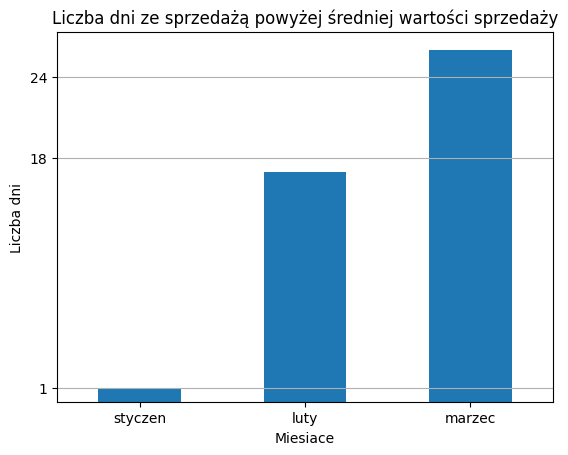

In [10]:
sprzedaz = dane_posortowane[['dzien', 'Miesiac', 'Sprzedaz_calkowita']].copy()
sprzedaz_wieksza_od_sredniej = sprzedaz[sprzedaz['Sprzedaz_calkowita'] > sprzedaz['Sprzedaz_calkowita'].mean()]
sprzedaz_wieksza_od_sredniej.describe
sortowane = sprzedaz_wieksza_od_sredniej.sort_values(['Miesiac', 'Sprzedaz_calkowita'])
sortowane.describe
grupowane = sortowane.groupby(['Miesiac'])['dzien'].count()
grupowane.plot.bar()
yticksy = (1, 18, 24)
plt.yticks(yticksy)
plt.title('Liczba dni ze sprzedażą powyżej średniej wartości sprzedaży')
plt.xlabel('Miesiace')
plt.ylabel('Liczba dni')
plt.grid(True, axis = 'y')
plt.xticks(rotation=0)
plt.show()

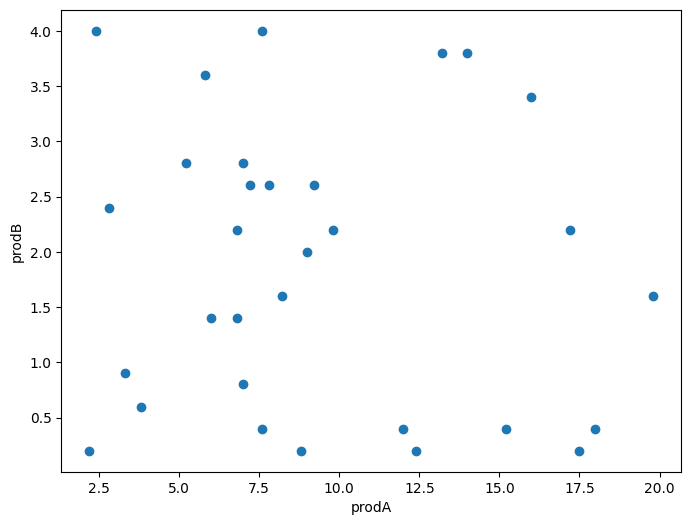

In [21]:
sprzedaz_marzec = dane[dane['Miesiac'] == 'marzec']
sprzedaz_marzec = sprzedaz_marzec.sort_values(by='prodA', ascending=False)

plt.figure(figsize=(8, 6))
plt.scatter(sprzedaz_marzec['prodA'], sprzedaz_marzec['prodB'])
plt.xlabel('prodA')
plt.ylabel('prodB')
plt.show()

In [12]:
sprzedaz = dane

In [13]:
sprzedaz

,dzien,prodA,prodB,Miesiac,Sprzedaz_calkowita
0,1,3.1,0.4,styczen,3.5
1,2,1.8,0.1,styczen,1.9
2,3,0.5,0.2,styczen,0.7
3,4,1.8,0.1,styczen,1.9
4,5,2.3,0.3,styczen,2.6
...,...,...,...,...,...
85,27,7.2,2.6,marzec,9.8
86,28,17.5,0.2,marzec,17.7
87,29,8.2,1.6,marzec,9.8
88,30,14.0,3.8,marzec,17.8


In [14]:
sprzedaz = sprzedaz[sprzedaz['Miesiac'] != 'luty']

kolejnoscMiesiecy2 = {'styczen': 1, 'marzec': 2}

sprzedaz['Miesiac'] = pd.Categorical(sprzedaz['Miesiac'], categories=kolejnoscMiesiecy2.keys(), ordered=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1840\1567405358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sprzedaz['Miesiac'] = pd.Categorical(sprzedaz['Miesiac'], categories=kolejnoscMiesiecy2.keys(), ordered=True)


In [15]:
sprzedaz_cal = sprzedaz.groupby(['Miesiac'])['Sprzedaz_calkowita'].sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1840\2691417212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sprzedaz_cal = sprzedaz.groupby(['Miesiac'])['Sprzedaz_calkowita'].sum()


In [16]:
sprzedaz_cal

Miesiac
styczen     76.9
marzec     347.3
Name: Sprzedaz_calkowita, dtype: float64

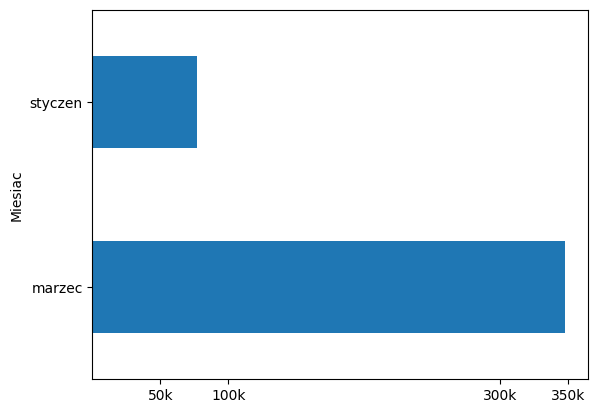

In [17]:
sprzedaz_cal.plot.barh()
xticks_positions = [50, 100, 300,350]
xticks_labels = ['50k', '100k', '300k','350k']
plt.xticks(xticks_positions, xticks_labels)

plt.gca().invert_yaxis()
plt.show()

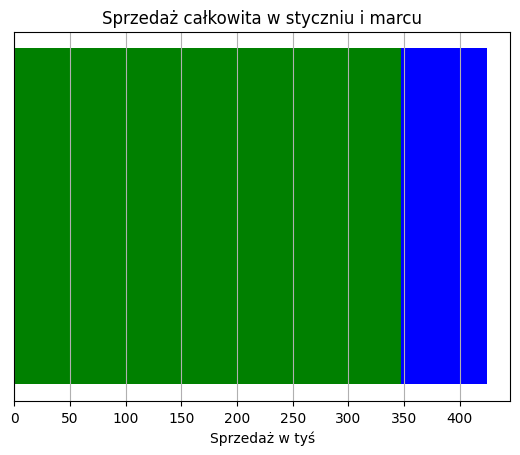

In [24]:
sprzedaz_marzec = sprzedaz[sprzedaz['Miesiac'] == 'marzec']['Sprzedaz_calkowita'].sum()
sprzedaz_styczen = sprzedaz[sprzedaz['Miesiac'] == 'styczen']['Sprzedaz_calkowita'].sum() + sprzedaz_marzec

plt.barh('styczen i marzec', [sprzedaz_styczen, sprzedaz_marzec], color=['blue', 'green'])
plt.title('Sprzedaż całkowita w styczniu i marcu')
plt.xlabel('Sprzedaż w tyś')
plt.ylabel('Total Sales')
plt.grid('x')
plt.gca().yaxis.set_visible(False)
plt.show()


In [19]:
dane_posortowane

,dzien,prodA,prodB,Miesiac,Sprzedaz_calkowita
0,1,3.1,0.4,styczen,3.5
1,2,1.8,0.1,styczen,1.9
2,3,0.5,0.2,styczen,0.7
3,4,1.8,0.1,styczen,1.9
4,5,2.3,0.3,styczen,2.6
...,...,...,...,...,...
85,27,7.2,2.6,marzec,9.8
86,28,17.5,0.2,marzec,17.7
87,29,8.2,1.6,marzec,9.8
88,30,14.0,3.8,marzec,17.8


C:\Users\DELL\AppData\Local\Temp\ipykernel_1840\436107091.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sumaprod = sprzedaz_ab.groupby(['Miesiac'])[['prodA', 'prodB']].sum()


,prodA,prodB
Miesiac,,
styczen,62.7,14.2
luty,177.6,32.1
marzec,289.6,57.7


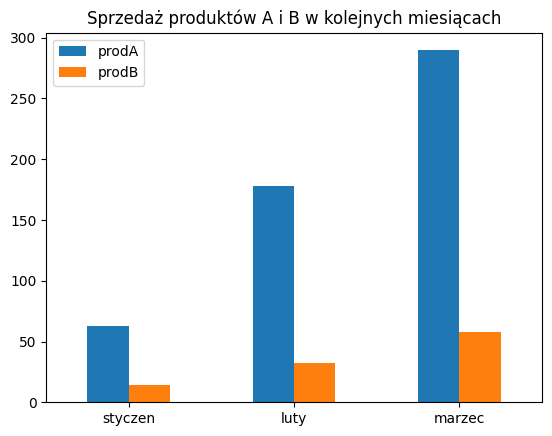

In [20]:
sprzedaz_ab = dane_posortowane[['dzien', 'Miesiac', 'prodA', 'prodB']].copy()
sumaprod = sprzedaz_ab.groupby(['Miesiac'])[['prodA', 'prodB']].sum()
display(sumaprod)
sumaprod.plot.bar()
plt.legend()
plt.title('Sprzedaż produktów A i B w kolejnych miesiącach')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()